In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

import imageio.v2 as imageio
import PIL
import scipy.ndimage as ndi
import PIL.Image
from collections import Counter

import tensorflow as tf
from tensorflow.keras.utils import img_to_array, array_to_img
import keras
from keras.preprocessing.image import ImageDataGenerator

# Load Data

In [2]:
train_dir = '../Capstone-Three-CNN/data/Training/'
test_dir = '../Capstone-Three-CNN/data/Testing/'

train_paths_unshuffled = []
train_labels_unshuffled = []

test_paths_unshuffled = []
test_labels_unshuffled = []

for label in os.listdir(train_dir):
    for image in os.listdir(f'{train_dir}{label}'):
        train_paths_unshuffled.append(f'{train_dir}{label}/{image}')
        train_labels_unshuffled.append(label)
    for image in os.listdir(f'{test_dir}{label}'):
        test_paths_unshuffled.append(f'{test_dir}{label}/{image}')
        test_labels_unshuffled.append(label)
        
#.shuffle is deprecated, find another way

In [ ]:
tf.keras.preprocessing.image.load_img(
    path, color_mode='grayscale', target_size=None, interpolation='bilinear'
)

img_array = img_to_array(img)
print(img_array[0])
print(img_array.dtype)
print(img_array.shape)

In [5]:
len(train_paths_unshuffled), len(test_paths_unshuffled)

(5712, 1311)

In [6]:
def cat_percentages(label_list, length):
    counts = Counter(label_list)
    for label in np.unique(label_list):
        percent = round(counts[label] / len(label_list) * 100, 2)
        print(f'{label}: {percent}%')

In [7]:
print('Training label percentages: ')
cat_percentages(train_labels_unshuffled, len(train_labels_unshuffled))

print('Testing label percentages: ')
cat_percentages(test_labels_unshuffled, len(test_labels_unshuffled))

Training label percentages: 
glioma: 23.13%
meningioma: 23.44%
notumor: 27.92%
pituitary: 25.51%
Testing label percentages: 
glioma: 22.88%
meningioma: 23.34%
notumor: 30.89%
pituitary: 22.88%


Train and test datasets are relatively balanced.

In [ ]:
# make all images 3 dimension -- e.g. (128,128,1)


In [11]:
# function to resize
def resize_image(input_image):
    batch = 64
    im_resized = tf.image.resize(input_image, (256,256), method='bilinear', preserve_aspect_ratio=True, antialias=True)
    return im_resized
    
# function to normalize and convert to float32
def normalize(input_image):
    input_im = tf.cast(input_image, tf.float32) / 255.0
    return input_im

# function to convert color -- will need to do this to mask as well
def convert_grayscale(input_image):
    input_im = input_image.convert('L')
    return input_im

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling

tf.keras.layers.Rescaling(
    scale, offset=0.0, **kwargs
)

For instance:
To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255.

In [19]:
train_img_dataset, val_img_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
    interpolation='bilinear',
    crop_to_aspect_ratio=True
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Using 1142 files for validation.


tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)
tf.Tensor([0. 1. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor([0. 1. 0. 0.], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)
tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)


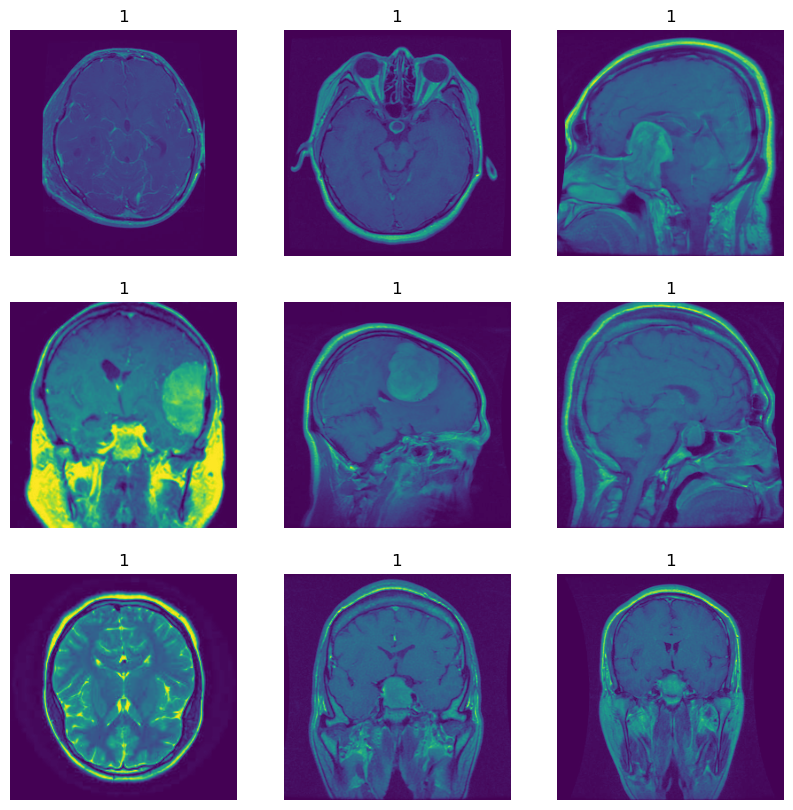

In [30]:
plt.figure(figsize=(10, 10))
for images, labels in train_img_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        print(labels[i])
        plt.imshow(images[i].numpy().astype('float32'))
        plt.title(1)
        plt.axis("off")

In [13]:
# function to create image array and label datasets
# converts to grayscale with Image.convert(), change uint8 to float, and normalize between 0 and 1 
# by dividing image through by 255

def create_im_dataset(im_dir):
    im_labels = []
    im_array = []
    for label in os.listdir(im_dir):
        for image in os.listdir(f'{im_dir}{label}'):
            im = PIL.Image.open(f'{im_dir}{label}/{image}')
            #im = convert_grayscale(im)
            im = resize_image(im) #-- wrong number of dimensions
            #im = normalize(im)
            #print(im.size)
            print(type(im))
            #im = np.array(im)
            #im_array.append(image)
            #im_labels.append(label)
    return im_labels, im_array

# use create_im_dataset function to create datasets
train_im_labels, train_im_array = create_im_dataset(train_dir)

#train_im_array = np.array(train_im_array)

# create dict of image classification labels
#label_dict = {k: v for v, k in enumerate(np.unique(train_im_labels))}
#label_dict

# convert string labels to enumerated labels
#labels_enum = [label_dict[train_im_labels[i]] for i in range(len(train_im_labels))]

#len(train_im_labels) # sanity check, same number



<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


ValueError: 'images' must have either 3 or 4 dimensions.

copy()

In [316]:
# function to create image array and label datasets
# converts to grayscale with Image.convert(), change uint8 to float, and normalize between 0 and 1 
# by dividing image through by 255
#image_decode = tf.image.decode_jpeg(read_image)
#resize_image = tf.image.resize(image_decode, [5, 10])

def create_im_dataset(im_dir):
    im_labels = []
    im_array = []
    for label in os.listdir(im_dir):
        for image in os.listdir(f'{im_dir}{label}'):
            size = (256,256)
            image = Image.open(f'{im_dir}{label}/{image}')
            image = image.resize(size, resample=Image.BICUBIC).convert('L') # trying bicubic as hopefully the best interpolation method
            image = normalize(image)
            #image /= 255
            #im = convert_grayscale(im)
            #im = resize_image(im) #-- wrong number of dimensions
            #im = normalize(im)
            im_array.append(image)
            im_labels.append(label)
    return im_labels, im_array

# use create_im_dataset function to create datasets
train_im_labels, train_im_array = create_im_dataset(train_dir)

train_im_array = np.array(train_im_array)

# create dict of image classification labels
label_dict = {k: v for v, k in enumerate(np.unique(train_im_labels))}
label_dict

# convert string labels to enumerated labels
labels_enum = [label_dict[train_im_labels[i]] for i in range(len(train_im_labels))]

#len(train_im_labels) # sanity check, same number

In [ ]:
# load and transform train and test images
def load_train_image(input_image):
    image = normalize(input_image)
    image = resize_image(image)
    image = convert_grayscale(image)
    return image

In [ ]:
# create image input to dataset pipeline with tf


**Shuffle data**

In [211]:
# function to check that random shuffle in equal label proportions to original
def count_labels(names, shuffled):
    label_list = []
    for path in shuffled:
        for i in range(len(names)):
            if names[i] in str(path):
                label_list.append(names[i])
    return label_list

# shuffle function
def shuffle(image_path_list):
    # include check that proportions are correct
    shuffled = random.sample(image_path_list, k=len(image_path_list))
    names = ['glioma', 'meningioma', 'notumor', 'pituitary']
    label_list = count_labels(names, shuffled)
    return shuffled, label_list

In [ ]:
train_paths_shuffled, train_labels_shuffled = shuffle(train_paths_unshuffled)

In [212]:
# sanity check shuffle
print('Shuffled label percentages: ')
cat_percentages(train_labels_shuffled, len(train_labels_shuffled))

Shuffled label percentages: 
glioma: 23.13%
meningioma: 23.44%
notumor: 27.92%
pituitary: 25.51%


In [201]:
len(train_paths_shuffled)

5712

(shuffled, label_list) is correctly labeled

# Plot and view images

In [235]:
def format_and_render_plot():
    # get current fig
    fig = plt.gcf()
    for ax in fig.axes:
        ax.legend(loc='center right')
    plt.show()

Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 252
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512)
Image type:  uint8
Min, max:  0 253
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512)
Image type:  uint8
Min, max:  0 255
Array shape:  (236, 214, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (449, 359, 3)
Image type:  uint8
Min, max:  0 248
Array shape:  (781, 733, 3)
Image type:  uint8
Min, max:  0 255


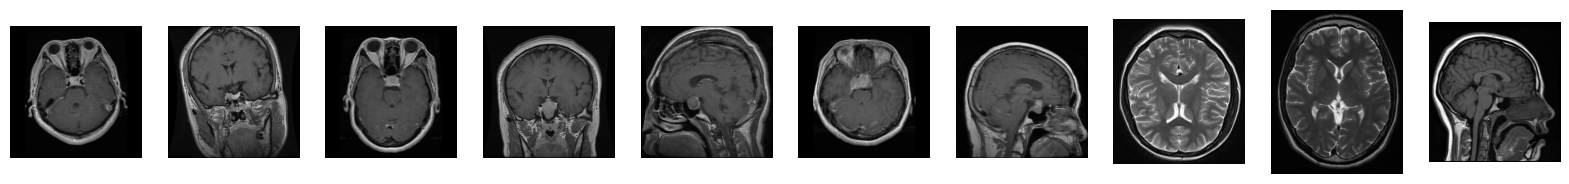

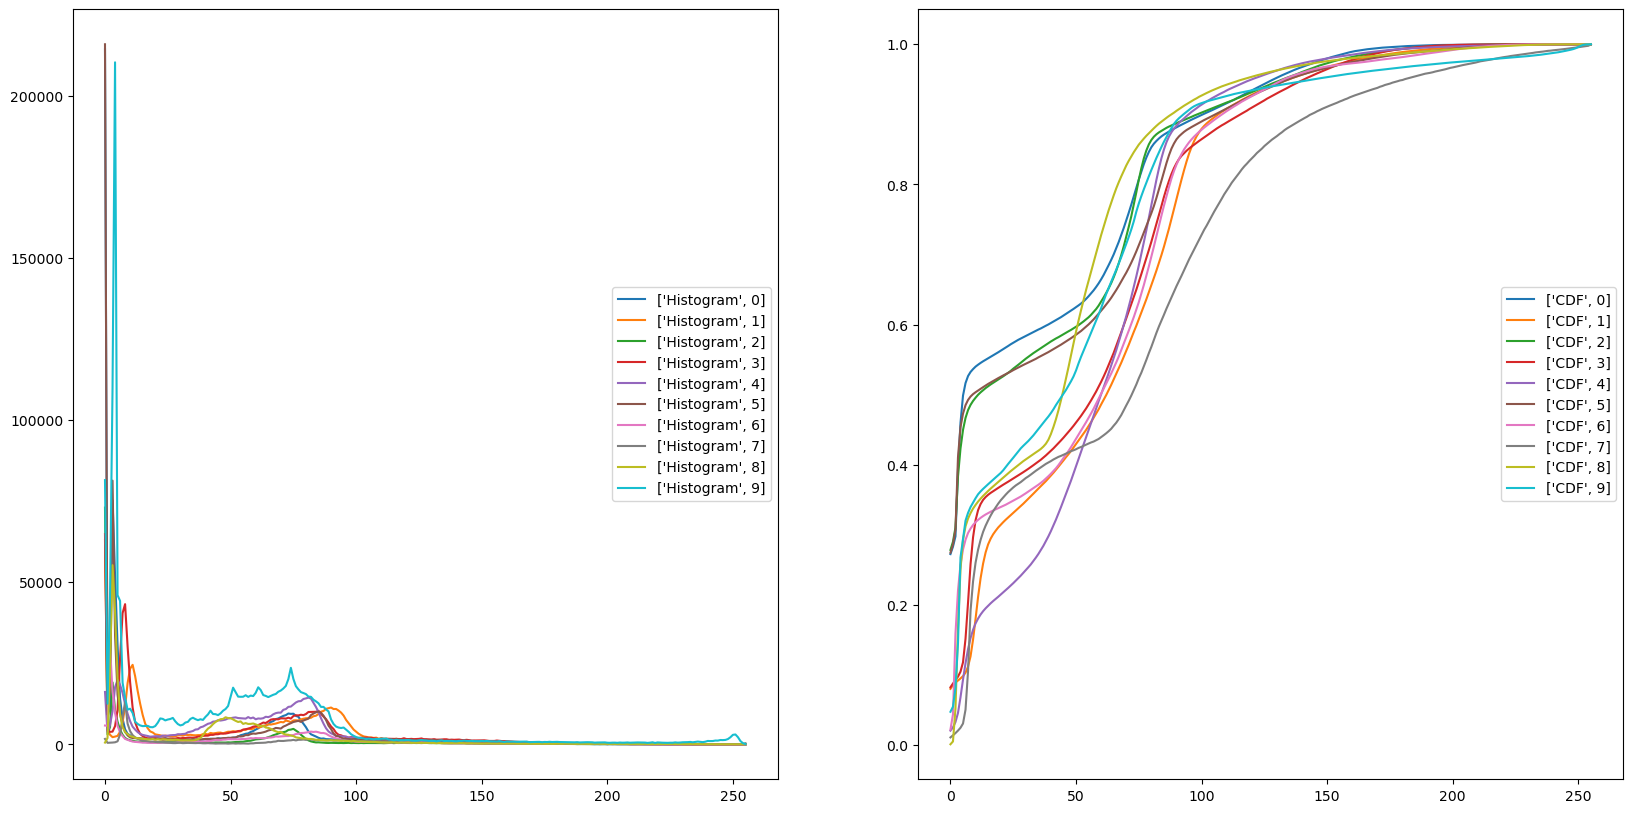

In [242]:
# print images (separated by 230)
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,10))
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for i in range(10):
    im = imageio.imread(train_paths_unshuffled[i*230])
    print('Array shape: ', im.shape)
    print('Image type: ', im.dtype)
    print('Min, max: ', im.min(), im.max())
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
    hist = ndi.histogram(im, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    axes1[0].plot(hist, label=['Histogram', i])
    axes1[1].plot(cdf, label=['CDF', i])
format_and_render_plot()

Dataset contains images with differing shape/intensity

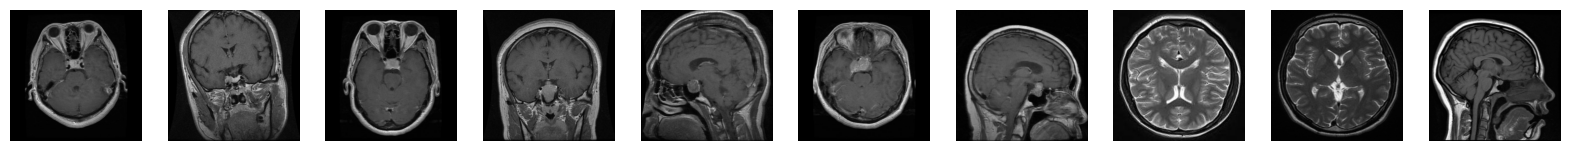

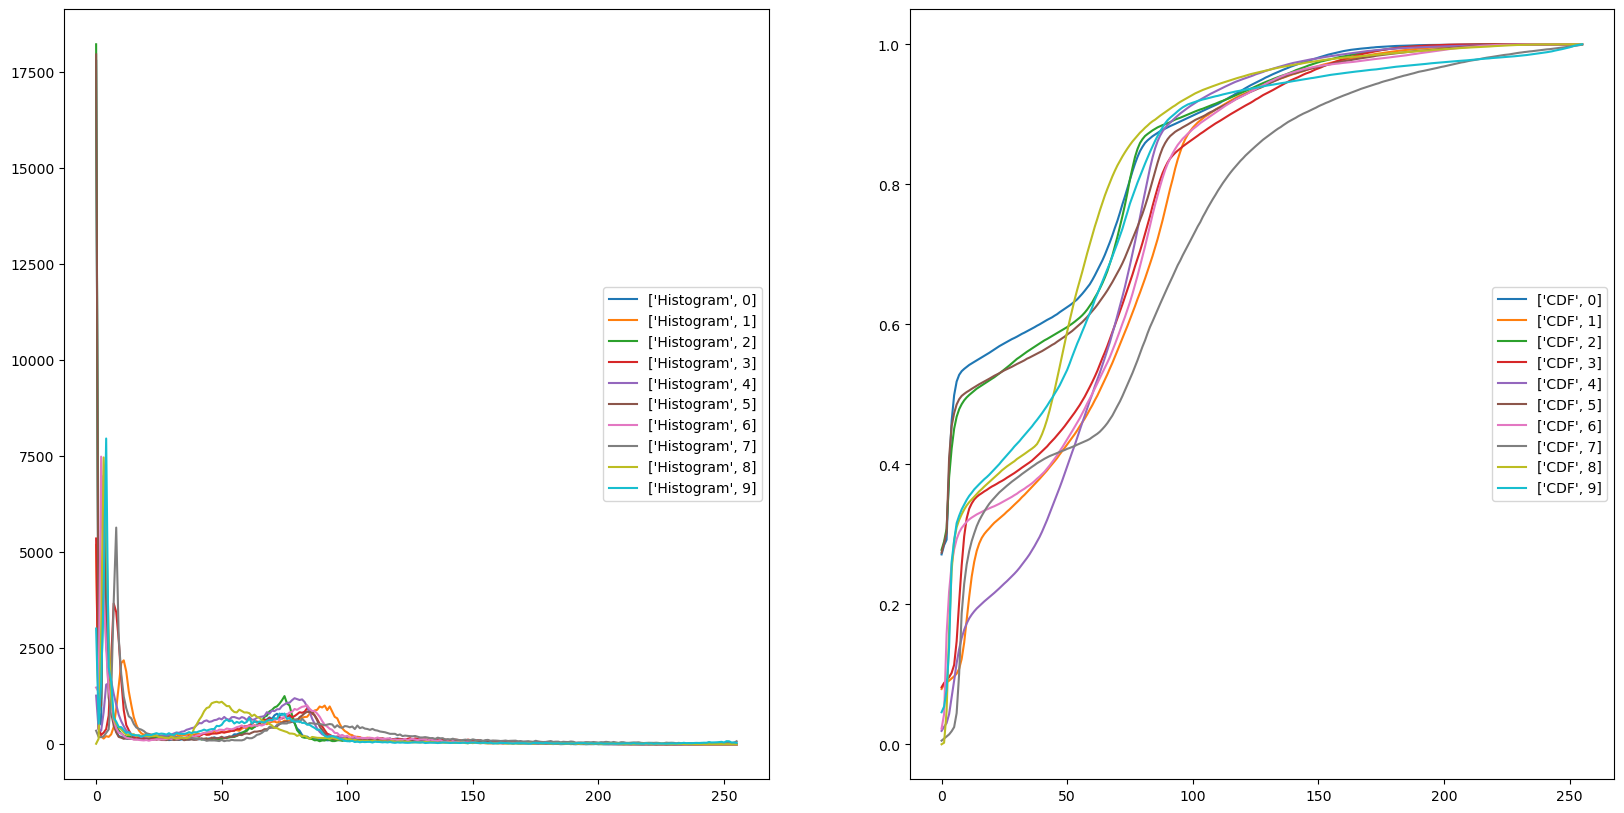

In [244]:
# plot images from resized and normalized array
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20))
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
for i in range(10):
    arr = train_im_array*255
    PIL_image = Image.fromarray(arr[i*230])
    axes[i].imshow(PIL_image, cmap='gray')
    axes[i].axis('off')
    hist = ndi.histogram(PIL_image, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    axes1[0].plot(hist, label=['Histogram', i])
    axes1[1].plot(cdf, label=['CDF', i])
format_and_render_plot()

After some preprocessing, images hist appears more uniform

**Thresholding**

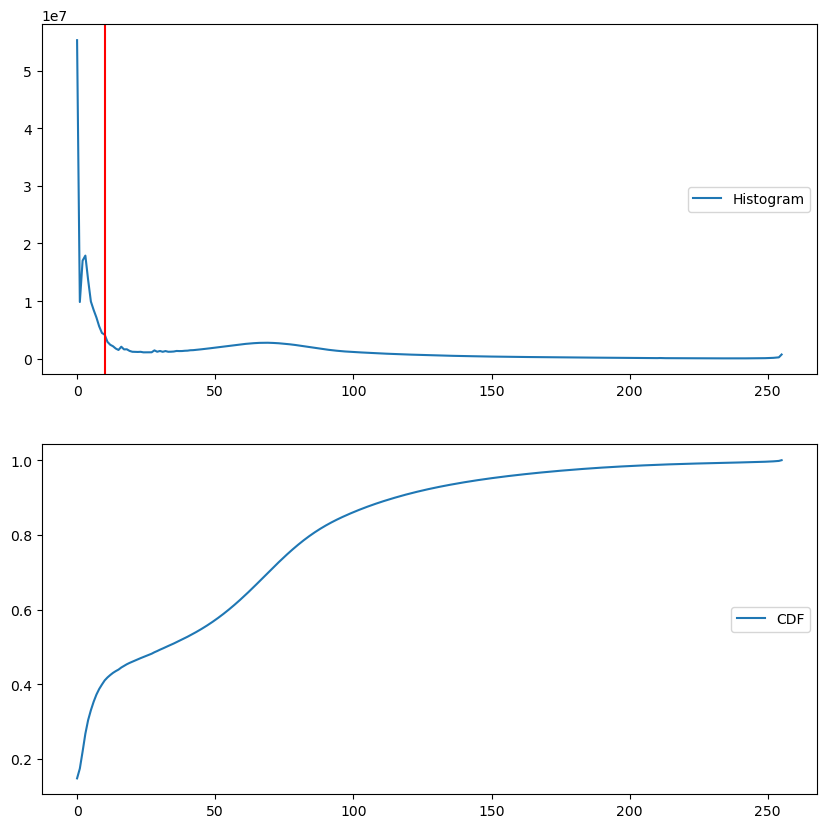

In [254]:
# all images histogram
hist = ndi.histogram(train_im_array*255, min=0, max=255, bins=256)
cdf = hist.cumsum() / hist.sum()

fig, axes = plt.subplots(2, 1, figsize=(10,10))
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
axes[0].axvline(x=10, color='r')
format_and_render_plot()

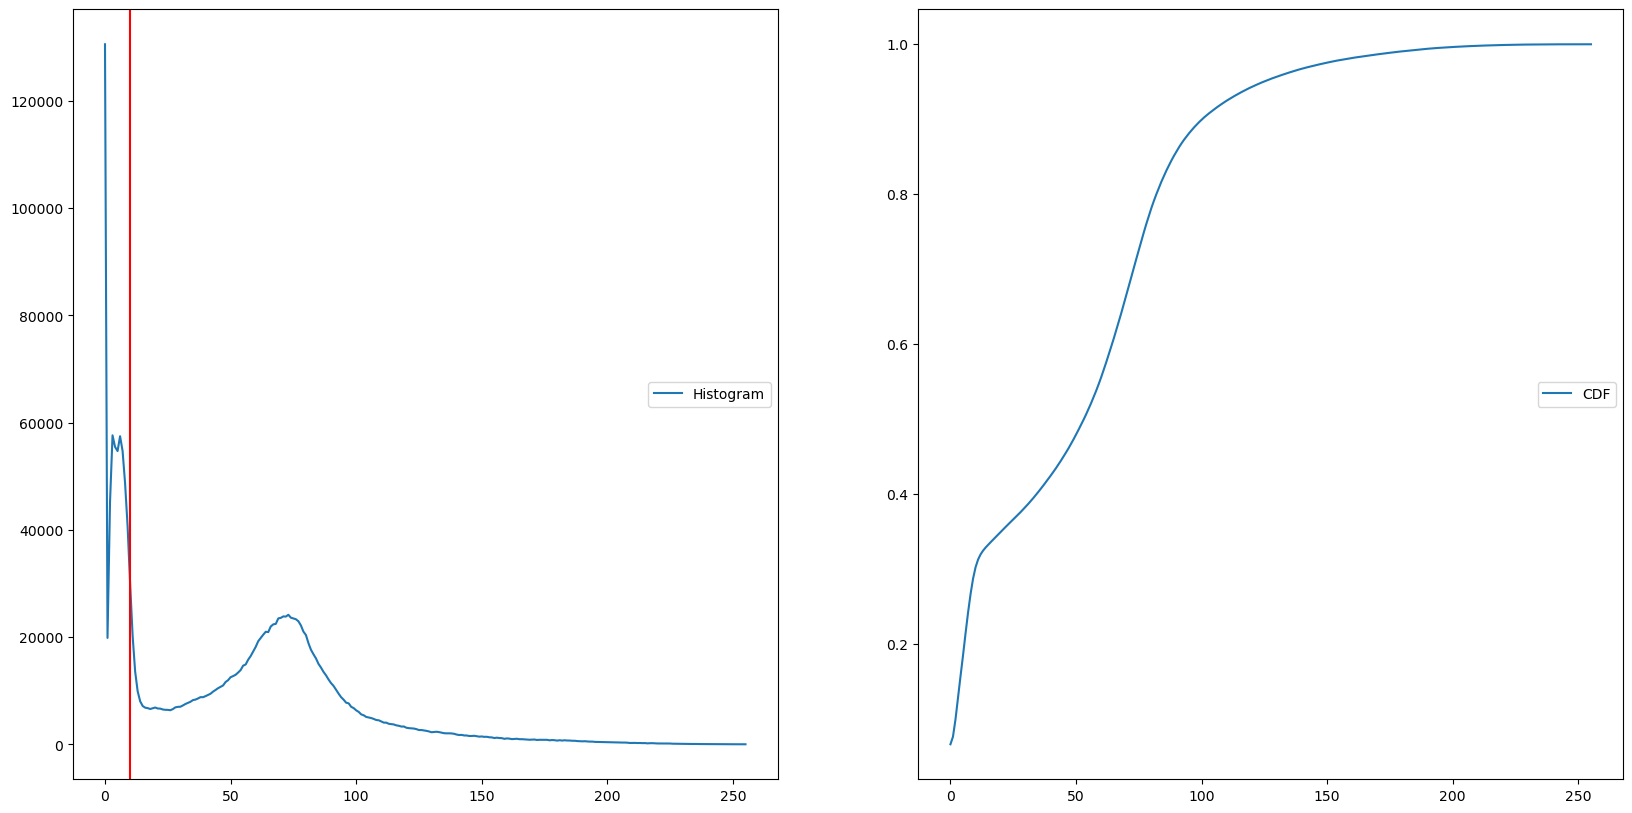

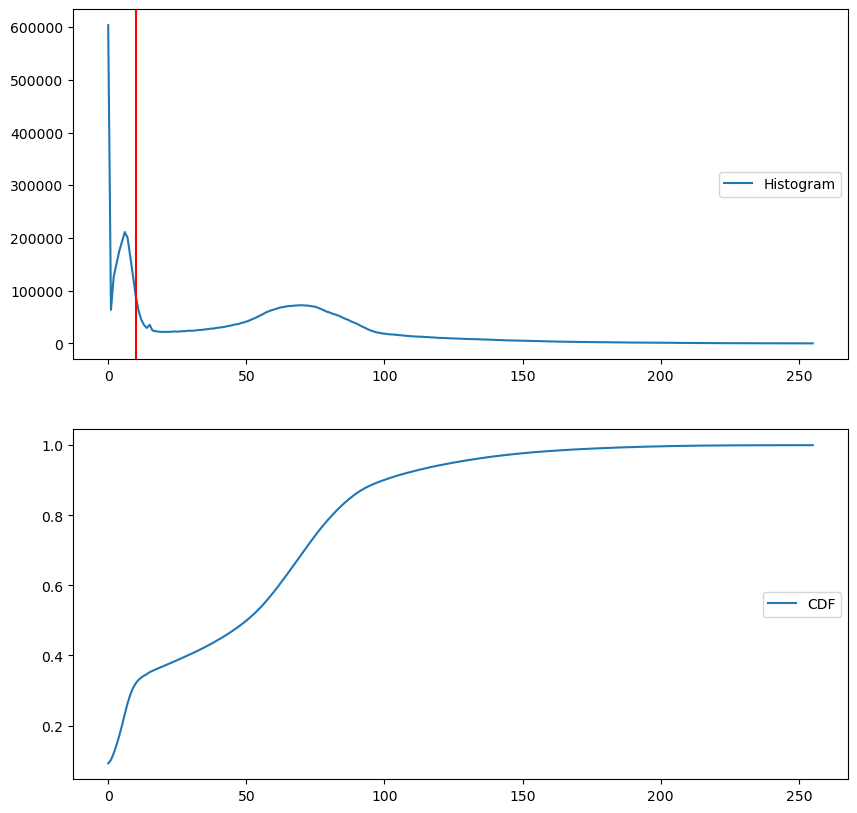

In [255]:
# distributions of different image groupings
hist1 = ndi.histogram(train_im_array[0:30]*255, min=0, max=255, bins=256)
cdf1 = hist1.cumsum() / hist1.sum()

hist2 = ndi.histogram(train_im_array[400:500]*255, min=0, max=255, bins=256)
cdf2 = hist2.cumsum() / hist2.sum()

fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].plot(hist1, label='Histogram')
axes[0].axvline(x=10, color='r')
axes[1].plot(cdf1, label='CDF')
format_and_render_plot()

# wider view, different subset of images
fig1, axes1 = plt.subplots(2, 1, figsize=(10,10))
axes1[0].plot(hist2, label='Histogram')
axes1[0].axvline(x=10, color='r')
axes1[1].plot(cdf2, label='CDF')
format_and_render_plot()

In [250]:
len(train_im_array)

5712

In [318]:
# use masks - skull stripping? crop neck? 
im_filt = ndi.median_filter(train_im_array*255, size=3)

mask_start = np.where(im_filt>10, 1, 0)
mask = ndi.binary_closing(mask_start)

labels, nlabels = ndi.label(mask)
print(f'Num labels: {nlabels}')

Num labels: 14585


In [ ]:
fig, axes = plt.subplots()
axes[0].imshow(mask, cmap='gray')

In [ ]:
labels = labels.flatten()

In [ ]:
labels

In [ ]:
# Create a `labels` overlay
overlay = np.where(labels>0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='gray', alpha=0.75)
plt.show()

In [ ]:
# enhance images - brightness, contrast

# could use keras ImageDataGenerator

In [ ]:
# augment images to train on or validate on
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_bone, cmap='gray')

In [ ]:
# build basic model

In [ ]:
# utilize pre-made model